In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\Manoj\\Desktop\\Edureka_Python')

In [3]:
data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [5]:
labelencoder_x = LabelEncoder()
sc_x = StandardScaler()
labelencoder_y = LabelEncoder()

In [7]:
x = data.iloc[:,0:20].values
x

array([[0.05978098, 0.06424127, 0.03202691, ..., 0.0078125 , 0.        ,
        0.        ],
       [0.06600874, 0.06731003, 0.04022873, ..., 0.0546875 , 0.046875  ,
        0.05263158],
       [0.0773155 , 0.08382942, 0.03671846, ..., 0.015625  , 0.0078125 ,
        0.04651163],
       ...,
       [0.14205626, 0.09579843, 0.18373124, ..., 2.9375    , 2.9296875 ,
        0.19475862],
       [0.14365874, 0.09062826, 0.18497617, ..., 3.59375   , 3.5859375 ,
        0.31100218],
       [0.16550895, 0.09288354, 0.18304392, ..., 0.5546875 , 0.546875  ,
        0.35      ]])

In [9]:
y = data.iloc[:,20].values
y

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [10]:
y = labelencoder_y.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
x = sc_x.fit_transform(x)
x

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
regressor = LogisticRegression()

In [16]:
regressor.fit(x_train, y_train)

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = regressor.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test, y_pred)

array([[296,  11],
       [  7, 320]], dtype=int64)

In [21]:
(296+320)/(296+11+7+320)


0.9716088328075709

In [22]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


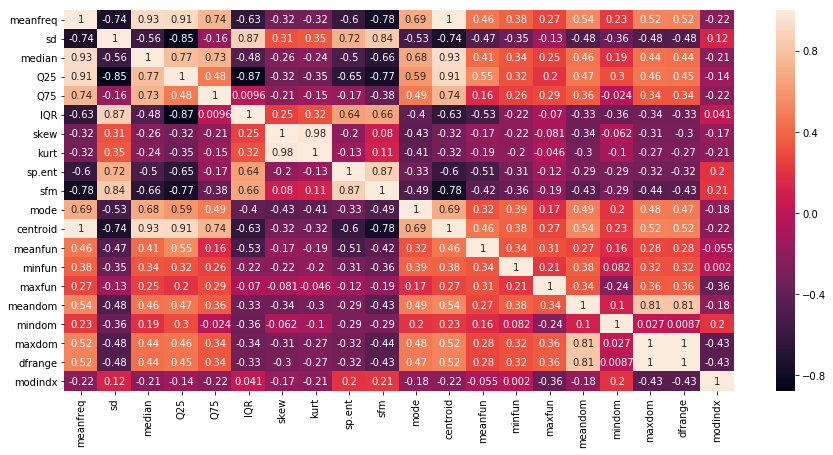

In [25]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(),annot= True)

In [29]:
pd.DataFrame(x)
new_x = x[:,1:20]

In [30]:
#Fit with new x
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2)

In [31]:
regressor.fit(x_train,y_train)

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
y_pred = regressor.predict(x_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[300,   9],
       [  6, 319]], dtype=int64)

In [34]:
(300+319)/(300+9+6+319)

0.9763406940063092